# Explore trained models

In [2]:
from src.data.pipelines import convnet_pipeline
from src.models import early_convnet

import os
import datetime

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-01-14 20:40:39.923784: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Pipeline
BATCH_SIZE_IMAGES = 1
BATCH_SIZE_PATCHES = 1
IMAGE_SIZE = 612
PATCH_SIZE = 40
PATCH_SIZE_ANNOTATION = 2
PATCH_STRIDE = 20
SLICE_TRAIN = ':10'
SLICE_VALID = '10:12'
SLICE_TEST = '12:20'

checkpoint_filepath = os.path.join(os.getcwd(),'..', 'models', 'ckpt', 'early_convnet')

In [4]:
input_pipeline = convnet_pipeline.ConvnetPipeline(
    SLICE_TRAIN,
    SLICE_VALID,
    SLICE_TEST,
    BATCH_SIZE_IMAGES,
    BATCH_SIZE_PATCHES,
    IMAGE_SIZE,
    PATCH_SIZE,
    PATCH_SIZE_ANNOTATION,
    PATCH_STRIDE
)

2024-01-14 20:41:14.944050: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
def display(display_list):
    plt.figure(figsize=(3, 3))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    print(len(display_list))
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [13]:
checkpoint_filepath

'/workspaces/CM3070_Final_project/notebooks/../models/ckpt/early_convnet'

In [16]:
model = early_convnet.EarlyConvnet()
latest = tf.train.latest_checkpoint(checkpoint_filepath)
model.load_weights(latest)

27/27 [==============================] - 0s 9ms/step
1


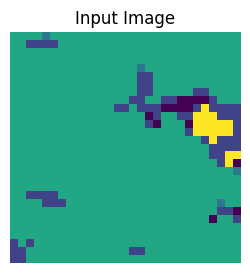

1


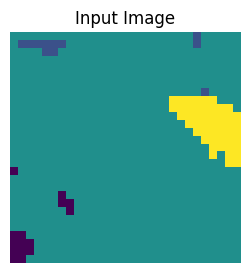

27/27 [==============================] - 0s 9ms/step
1


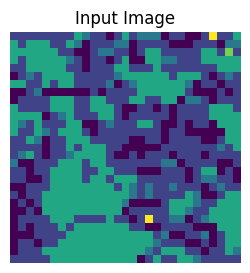

1


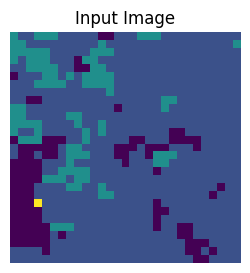

27/27 [==============================] - 0s 11ms/step
1


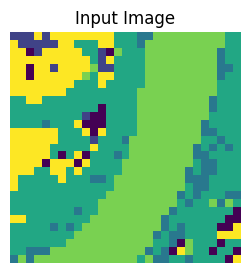

1


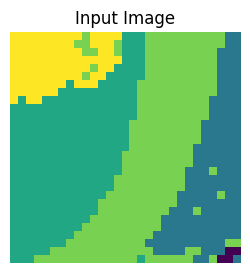

27/27 [==============================] - 0s 13ms/step
1


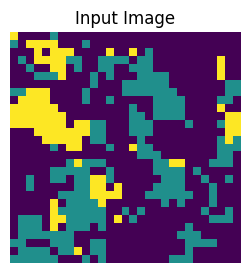

1


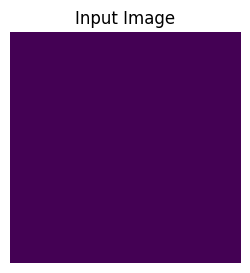

27/27 [==============================] - 0s 14ms/step
1


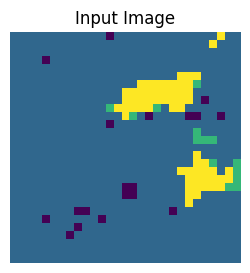

1


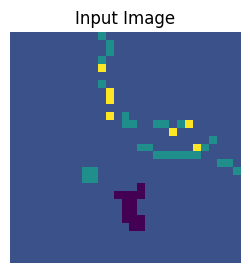

27/27 [==============================] - 0s 6ms/step
1


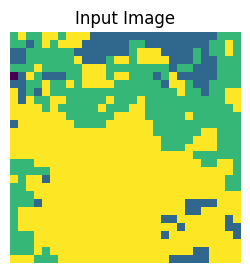

1


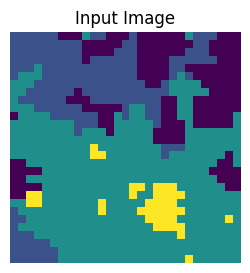

27/27 [==============================] - 0s 6ms/step
1


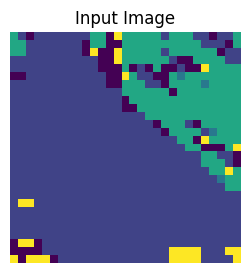

1


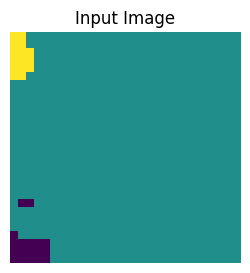

27/27 [==============================] - 0s 6ms/step
1


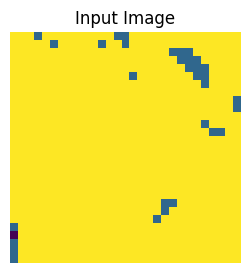

1


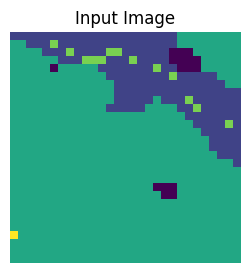

In [18]:
for i, m in input_pipeline.test.take(8):
    # print(tf.unique(tf.argmax(tf.reshape(m, shape=[-1, 7]), axis=1)))
    gt = m
    y = model.predict(i)
    gt_mask = tf.reshape(tf.argmax(input=gt, axis=3), shape=(1, 29, 29, 1))
    mask = tf.reshape(tf.argmax(input=y, axis=3), shape=(1, 29, 29, 1))
    display(mask)
    display(gt_mask)